In [1]:
ColabNotebook = 'google.colab' in str(get_ipython())

if ColabNotebook:
    # monta G-drive en entorno COLAB
    from google.colab import drive
    drive.mount('/content/drive/')

    # carpeta donde se encuentran archivos .py auxiliares
    FUENTES_DIR = '/content/drive/MyDrive/Colab Notebooks/FUENTES/'
    DATOS_DIR = '/content/drive/MyDrive/Colab Notebooks/DATOS/'      # carpeta donde se encuentran los datasets
else:
    # configuración para notebook con instalación LOCAL
    FUENTES_DIR = '../Fuentes'         # carpeta donde se encuentran archivos .py auxiliares
    DATOS_DIR   = '../Datos/' # carpeta donde se encuentran los datasets

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)

In [2]:
%matplotlib inline
import numpy as np
from matplotlib import pylab as plt
from IPython import display

import grafica as gr
# Ajustar el tamaño predeterminado de las figuras
plt.rcParams['figure.figsize'] = [4,3]

In [3]:
# Ejemplos de entrada de la función AND
X = np.array([[0,0], 
              [0,1],
              [1,0],
              [1,1]])
CantEjemplos = X.shape[0]

#-- Respuesta esperada para cada ejemplo
T = np.array([0,0,0,1])

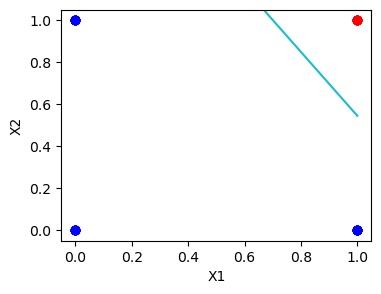

In [27]:
# --- titulos y ph se utilizan sólo para dibujar ---
plt.clf()
titulos = ['X1', 'X2']
ph=0


#--- Los pesos iniciales son aleatorios
W = np.array(np.random.uniform(-0.5, 0.5, size=2))
b = np.random.uniform(-0.5, 0.5)

#--- al finalizar ERRORES debe contener la cantidad de cambios realizados en c/iteración ---
errores = []

#--- parámetros del PERCEPTRON ---
MAX_ITE = 40
alfa = 0.1

# --- Entrenamiento del PERCEPTRON ---
ite = 0
hubo_cambio=True
while (ite < MAX_ITE) and (hubo_cambio==True):
    hubo_cambio= False
    for e in range(CantEjemplos):
        neta = W[0]*X[e,0] + W[1]*X[e,1] + b
        y = (neta>0)*1
        if (T[e]!=y): # Si es incorrecta actualiza W y b
            W[0]= W[0]+ alfa*(T[e]-y)*X[e,0]
            W[1]= W[1]+ alfa*(T[e]-y)*X[e,1]
            b = b + alfa*(T[e]-y)
            hubo_cambio = True   
      
    # dibujar nuevamente la recta            
    ph = gr.dibuPtosRecta(X,T, W, b, titulos, ph) 
    ite = ite+1
      

In [21]:
print(W)
print(b)

[0.3398027  0.25914854]
-0.5302035831457999


In [6]:
print(X)
print(T)

[[0 0]
 [0 1]
 [1 0]
 [1 1]]
[0 0 0 1]


In [7]:
netas = W @ X.T + b
y = (netas>0) * 1
print(netas)
print(y)

[-0.16662622 -0.12065849 -0.03348368  0.01248405]
[0 0 0 1]


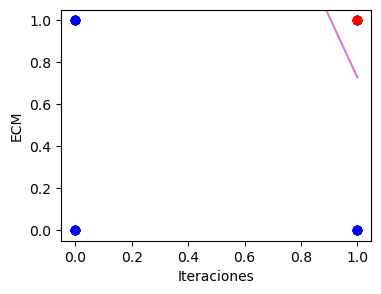

In [8]:
plt.plot(range(1, len(errores) + 1), errores, marker='o')
plt.xlabel('Iteraciones')
plt.ylabel('ECM')
plt.show()